In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('alloy_upd2.csv')

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           223 non-null    object 
 1   filename     223 non-null    object 
 2   alloy        223 non-null    object 
 3   pass         223 non-null    int64  
 4   level        223 non-null    int64  
 5   p            223 non-null    float64
 6   N_disangles  223 non-null    int64  
 7   H_2bins      223 non-null    float64
 8   H_5bins      223 non-null    float64
 9   H_13bins     223 non-null    float64
 10  H_32bins     223 non-null    float64
 11  H_63bins     223 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 21.0+ KB


,id,filename,alloy,pass,level,p,N_disangles,H_2bins,H_5bins,H_13bins,H_32bins,H_63bins
0,Cu_01Cr_01Zr_pass1_1,DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt,Cu_01Cr_01Zr,1,1,0.23548,2858,0.249838,0.275122,0.312578,0.317661,0.320646
1,Cu_01Cr_01Zr_pass1_2,DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt,Cu_01Cr_01Zr,1,2,0.17960,6598,0.201651,0.221387,0.250090,0.254014,0.255788
2,Cu_01Cr_01Zr_pass1_3,DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt,Cu_01Cr_01Zr,1,3,0.14252,11163,0.166237,0.190621,0.216656,0.220165,0.221214
3,Cu_01Cr_01Zr_pass1_4,DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt,Cu_01Cr_01Zr,1,4,0.13200,15992,0.155497,0.181072,0.200042,0.202618,0.203285
4,Cu_01Cr_01Zr_pass1_5,DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt,Cu_01Cr_01Zr,1,5,0.11212,20647,0.134122,0.159668,0.178905,0.181700,0.182066


In [5]:
data.alloy.unique()

array(['Cu_01Cr_01Zr', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg'],
      dtype=object)

In [11]:
def func_exp(x, b, c):
    return np.exp(- b * x) + c

def func_exp2(x, a, c):
    return a * np.exp(- 1 * x) + c

def func_sqrt(x, b, c):
    return b*np.sqrt(1 / x) + c

def func_sqrt2(x, b):
    return b*np.sqrt(1 / x) + 0.02277

def func_exp3(x, b):
    return np.exp(- b * (x - 1)) # + 0.02277

In [7]:
alloys = {'Cu_01Cr_01Zr': [1, 4, 8], 'Cu_01Cr_01Zr_005Y': [4, 8], 'Cu_03Cr_05Zr': [1, 4], 'Cu_Mg': [1, 2, 4, 8]}

In [13]:
b_estimates = {}

In [45]:
colors = {1: 'C1', 4: 'C2', 8: 'C3', 2: 'C4'}

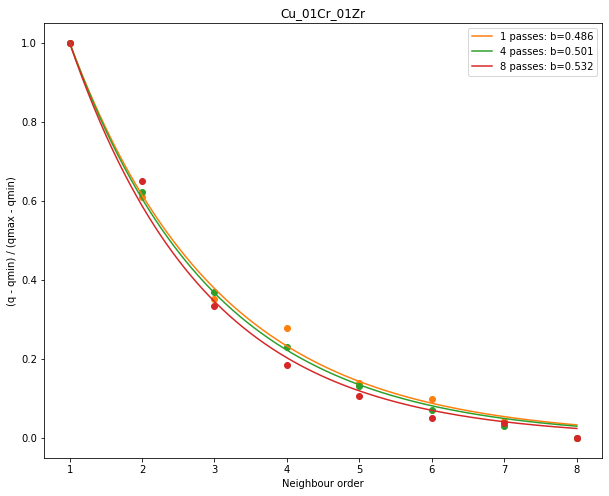

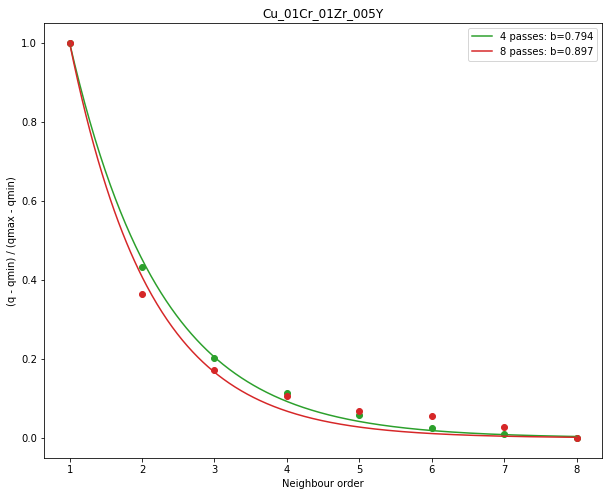

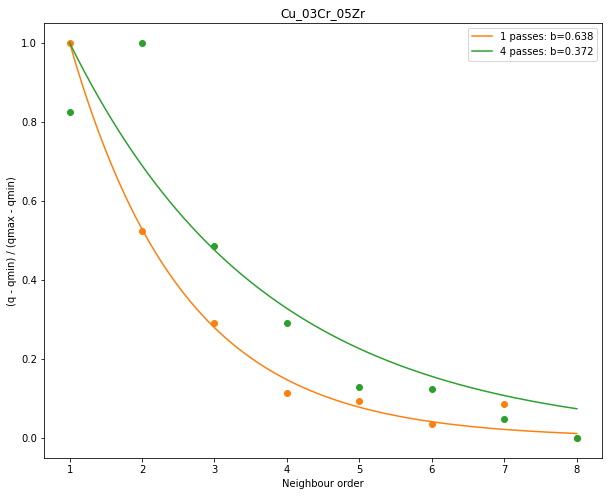

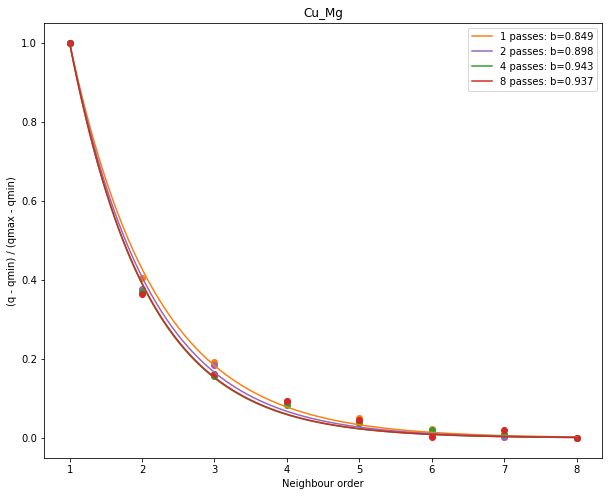

In [48]:
for alloy in alloys:
    b_estimates[alloy] = {}
    plt.figure(figsize=(10,8))
    for pass_ in alloys[alloy]:
        feature = 'p'
        xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
        ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values
        ydata = (ydata - ydata.min())/(ydata.max() - ydata.min())

        # popt1, pcov = curve_fit(func_exp, xdata, ydata)
        #popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
        # popt3, pcov = curve_fit(func_exp2, xdata, ydata)
        popt4, pcov = curve_fit(func_exp3, xdata, ydata)
        # popt5, pcov = curve_fit(func_sqrt2, xdata, ydata)
        b_estimates[alloy][pass_] = popt4[0]
        
        x = np.linspace(min(xdata), max(xdata), 500)
        plt.scatter(xdata, ydata, c=colors[pass_])
        # plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
        # plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
        # plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
        # plt.plot(x, func_exp3(x, *popt4), 'C1-', label='exp(- b * (x - 1)): b=%5.3f' % tuple(popt4))
        plt.plot(x, func_exp3(x, *popt4), c=colors[pass_], label=f'{pass_} passes: b=%5.3f' % tuple(popt4))
        #plt.plot(x, func_sqrt2(x, *popt5), 'C5-', label='sqrt2: b=%5.3f' % tuple(popt5))
        plt.xlabel('Neighbour order')
        plt.ylabel('(q - qmin) / (qmax - qmin)')
        plt.title(alloy) # + f'/pass{pass_}')
        plt.legend()
#         print(alloy, pass_, (ydata[0] - ydata[-1]) / ydata[0])
#         print(alloy, pass_, ydata[0]/ydata[-1])
        plt.savefig(f'exp_b_{alloy}.png', dpi=300)
        

In [37]:
pd.DataFrame.from_dict(b_estimates).transpose()[[1, 2, 4, 8]]

,1,2,4,8
Cu_01Cr_01Zr,0.486233,NaN,0.501421,0.531783
Cu_01Cr_01Zr_005Y,NaN,NaN,0.793533,0.896571
Cu_03Cr_05Zr,0.638043,NaN,0.371858,NaN
Cu_Mg,0.848716,0.898079,0.942847,0.936790


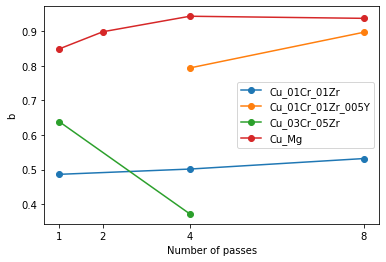

In [41]:
for alloy in alloys:
    plt.plot(b_estimates[alloy].keys(), b_estimates[alloy].values(), label=alloy, marker='o')
plt.legend()
plt.xlabel('Number of passes')
plt.xticks([1, 2, 4, 8])
plt.ylabel('b')
plt.show()

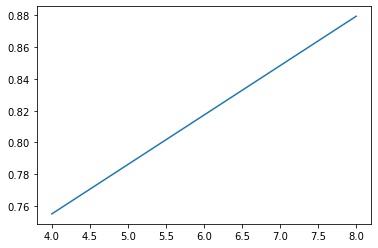

In [20]:
plt.plot(b_estimates['Cu_01Cr_01Zr_005Y'].keys(), b_estimates['Cu_01Cr_01Zr_005Y'].values())

Cu_01Cr_01Zr 1 0.7212077458807541
Cu_01Cr_01Zr 1 3.586900228484387


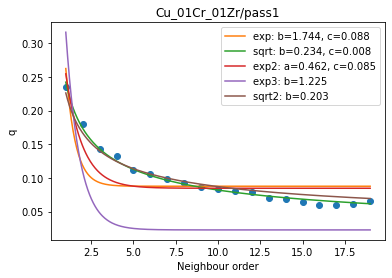

Cu_01Cr_01Zr 4 0.8960677615541822
Cu_01Cr_01Zr 4 9.62165363657901


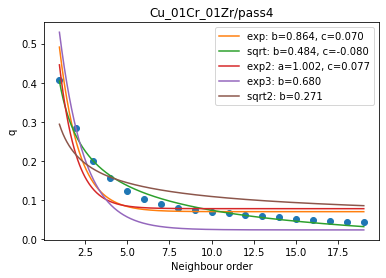

Cu_01Cr_01Zr 8 0.3226645849596669
Cu_01Cr_01Zr 8 1.4763734152900498


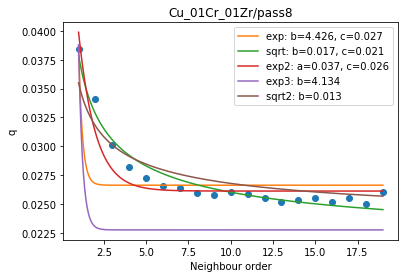

Cu_01Cr_01Zr_005Y 4 0.846157802695196
Cu_01Cr_01Zr_005Y 4 6.50016716817118


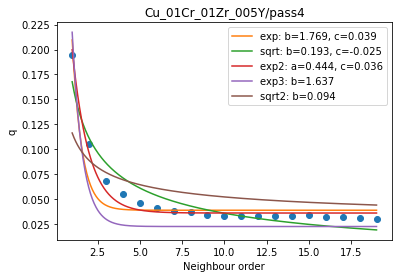

Cu_01Cr_01Zr_005Y 8 0.7848385425660508
Cu_01Cr_01Zr_005Y 8 4.647672552166934


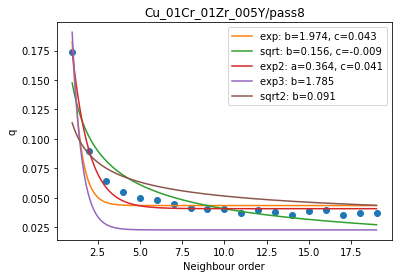

Cu_03Cr_05Zr 1 1.0
Cu_03Cr_05Zr 1 inf


C:\Users\Oleg\AppData\Local\Temp\ipykernel_3732\288948238.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  print(alloy, pass_, ydata[0]/ydata[-1])


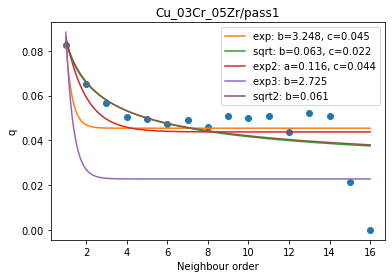

Cu_03Cr_05Zr 4 0.32856137057028867
Cu_03Cr_05Zr 4 1.4893393918210416


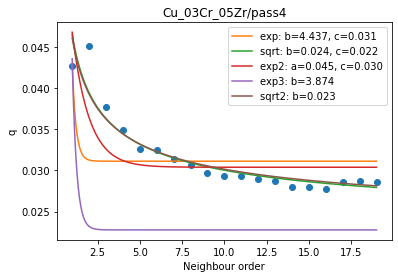

Cu_Mg 1 0.8310741425344013
Cu_Mg 1 5.9197568389057755


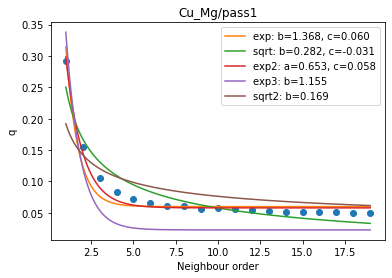

Cu_Mg 2 0.8085880897685104
Cu_Mg 2 5.224335302806499


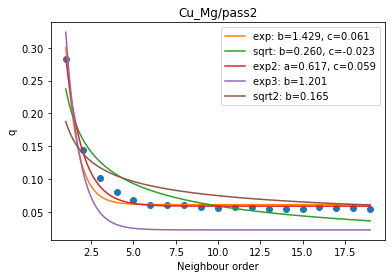

Cu_Mg 4 0.7645310914625308
Cu_Mg 4 4.246845183133272


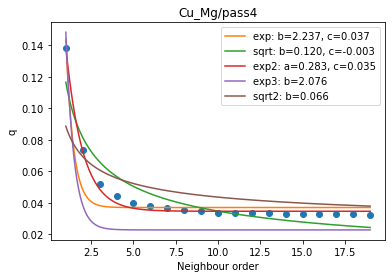

Cu_Mg 8 0.6063001145475373
Cu_Mg 8 2.5400058190282224


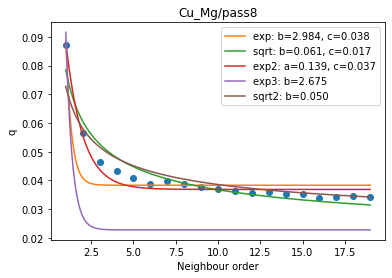

In [21]:
for alloy in alloys:
    for pass_ in alloys[alloy]:
        feature = 'p'
        xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 20), 'level'].values
        ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 20), feature].values

        popt1, pcov = curve_fit(func_exp, xdata, ydata)
        popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
        popt3, pcov = curve_fit(func_exp2, xdata, ydata)
        popt4, pcov = curve_fit(func_exp3, xdata, ydata)
        popt5, pcov = curve_fit(func_sqrt2, xdata, ydata)

        x = np.linspace(min(xdata), max(xdata), 500)
        plt.scatter(xdata, ydata)
        plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
        plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
        plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
        plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
        plt.plot(x, func_sqrt2(x, *popt5), 'C5-', label='sqrt2: b=%5.3f' % tuple(popt5))
        plt.xlabel('Neighbour order')
        plt.ylabel('q')
        plt.title(alloy + f'/pass{pass_}')
        plt.legend()
        print(alloy, pass_, (ydata[0] - ydata[-1]) / ydata[0])
        print(alloy, pass_, ydata[0]/ydata[-1])
        plt.show()
        

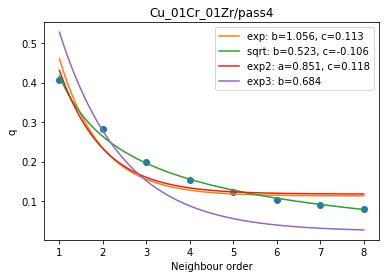

In [8]:
alloy = 'Cu_01Cr_01Zr'
pass_ = 4
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)
popt4, pcov = curve_fit(func_exp3, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

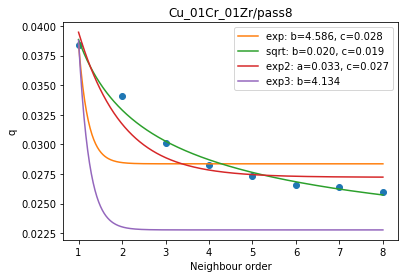

In [9]:
alloy = 'Cu_01Cr_01Zr'
pass_ = 8
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)
popt4, pcov = curve_fit(func_exp3, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

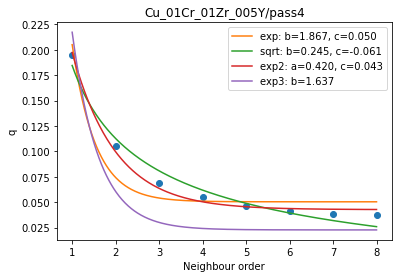

In [10]:
alloy = 'Cu_01Cr_01Zr_005Y'
pass_ = 4
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)
popt4, pcov = curve_fit(func_exp3, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

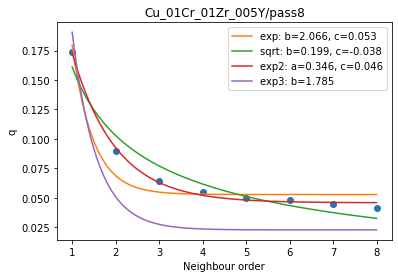

In [11]:
alloy = 'Cu_01Cr_01Zr_005Y'
pass_ = 8
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)
popt4, pcov = curve_fit(func_exp3, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

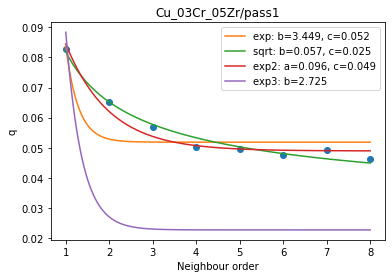

In [12]:
alloy = 'Cu_03Cr_05Zr'
pass_ = 1
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)
popt4, pcov = curve_fit(func_exp3, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.plot(x, func_exp3(x, *popt4), 'C4-', label='exp3: b=%5.3f' % tuple(popt4))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

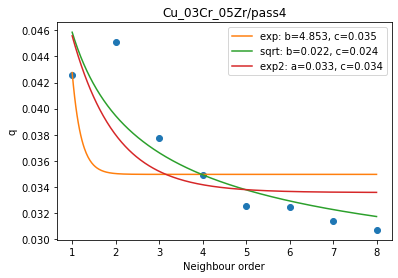

In [13]:
alloy = 'Cu_03Cr_05Zr'
pass_ = 4
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

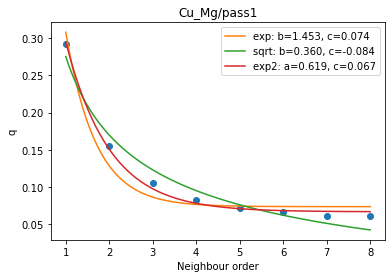

In [14]:
alloy = 'Cu_Mg'
pass_ = 1
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

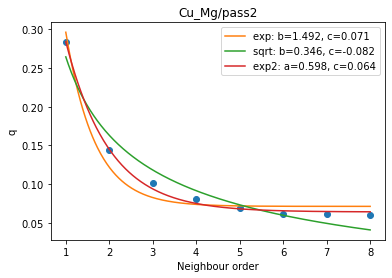

In [15]:
alloy = 'Cu_Mg'
pass_ = 2
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

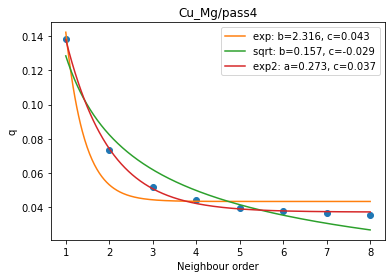

In [16]:
alloy = 'Cu_Mg'
pass_ = 4
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()

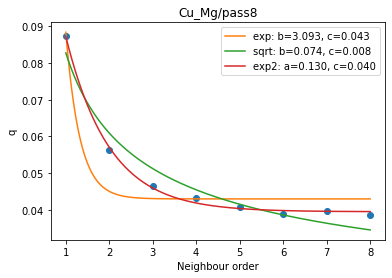

In [17]:
alloy = 'Cu_Mg'
pass_ = 8
feature = 'p'
xdata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), 'level'].values
ydata = data.loc[(data['alloy'] == alloy)&(data['pass'] == pass_)&(data['level'] < 9), feature].values

popt1, pcov = curve_fit(func_exp, xdata, ydata)
popt2, pcov = curve_fit(func_sqrt, xdata, ydata)
popt3, pcov = curve_fit(func_exp2, xdata, ydata)

x = np.linspace(min(xdata), max(xdata), 500)
plt.scatter(xdata, ydata)
plt.plot(x, func_exp(x, *popt1), 'C1-', label='exp: b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(x, func_sqrt(x, *popt2), 'C2-', label='sqrt: b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(x, func_exp2(x, *popt3), 'C3-', label='exp2: a=%5.3f, c=%5.3f' % tuple(popt3))
plt.xlabel('Neighbour order')
plt.ylabel('q')
plt.title(alloy + f'/pass{pass_}')
plt.legend()
plt.show()